In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima
import datetime as dt
from sklearn.linear_model import LinearRegression




In [2]:
data = pd.read_csv('total_close.csv')

### Since We have already established that the time series is not stationary in the inferencial Statistics Notebook. We have to make it stationary

## First apply differencing and check ADF

In [3]:
data['Date'] = pd.to_datetime(data.Date,format='%Y-%m-%d')
data.index = data['Date']

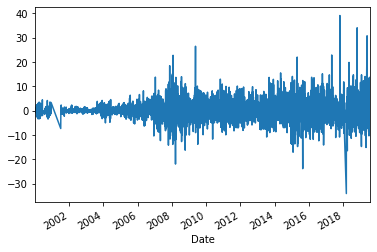

In [4]:
data['Close_diff_icici'] = data['Close_icici'] - data['Close_icici'].shift(1)
data['Close_diff_icici'].dropna().plot()

## Apply ADF test to check for stationarity

In [5]:
close_diff_icici = data['Close_diff_icici']

In [6]:
close_diff_icici.dropna(inplace=True)

In [7]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = close_diff_icici.rolling(window=12).mean()
    rolstd = close_diff_icici.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

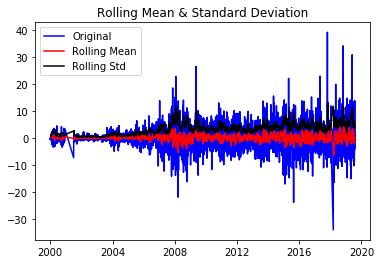

Results of Dickey-Fuller Test:
Test Statistic                  -30.399677
p-value                           0.000000
#Lags Used                        5.000000
Number of Observations Used    4626.000000
Critical Value (1%)              -3.431764
Critical Value (5%)              -2.862165
Critical Value (10%)             -2.567103
dtype: float64


In [8]:
test_stationarity(close_diff_icici)

### Since the test statistic is lower then critical value we can infer that this is now a stationary series

### Checking for stationarity of other banks as well

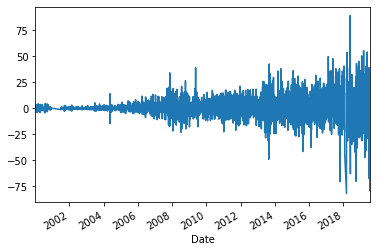

In [9]:
data['Close_diff_hdfc'] = data['Close_hdfc'] - data['Close_hdfc'].shift(1)
data['Close_diff_hdfc'].dropna().plot()

In [10]:
close_diff_hdfc = data['Close_diff_hdfc']

In [11]:
close_diff_hdfc.dropna(inplace=True)

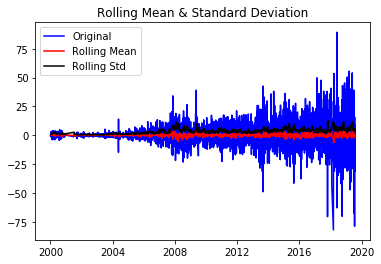

Results of Dickey-Fuller Test:
Test Statistic                -1.225821e+01
p-value                        9.206196e-23
#Lags Used                     2.500000e+01
Number of Observations Used    4.606000e+03
Critical Value (1%)           -3.431771e+00
Critical Value (5%)           -2.862168e+00
Critical Value (10%)          -2.567104e+00
dtype: float64


In [12]:
test_stationarity(close_diff_hdfc)

### Since the test statisitic is still greater then critical value the series is still not stationary
### So lets try to take a higher order differencing to see if that makes it stationary

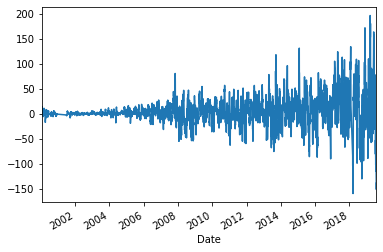

In [13]:
data['Close_diff_hdfc_10'] = data['Close_hdfc'] - data['Close_hdfc'].shift(10)
data['Close_diff_hdfc_10'].dropna().plot()

In [14]:
close_diff_hdfc_10 = data['Close_diff_hdfc_10']
close_diff_hdfc_10.dropna(inplace=True)

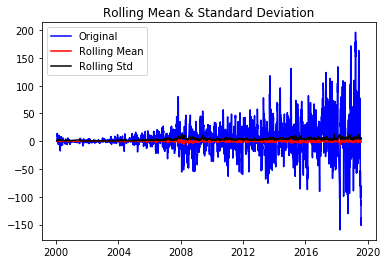

Results of Dickey-Fuller Test:
Test Statistic                -9.702311e+00
p-value                        1.064148e-16
#Lags Used                     3.200000e+01
Number of Observations Used    4.590000e+03
Critical Value (1%)           -3.431775e+00
Critical Value (5%)           -2.862170e+00
Critical Value (10%)          -2.567105e+00
dtype: float64


In [15]:
test_stationarity(close_diff_hdfc_10)

## Differencing of order 10 required for HDFC

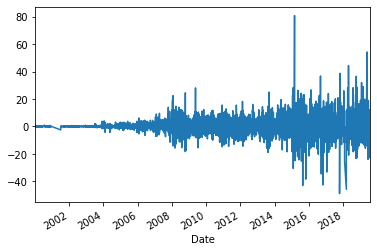

In [16]:
data['Close_diff_axis'] = data['Close_axis'] - data['Close_axis'].shift(1)
data['Close_diff_axis'].dropna().plot()

In [17]:
axis_diff = data['Close_diff_axis']
axis_diff.dropna(inplace=True)

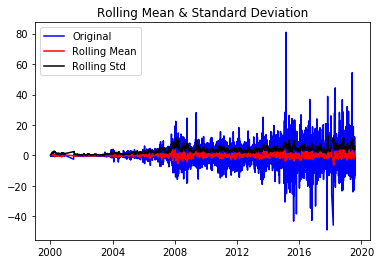

Results of Dickey-Fuller Test:
Test Statistic                -1.516842e+01
p-value                        6.442051e-28
#Lags Used                     1.800000e+01
Number of Observations Used    4.613000e+03
Critical Value (1%)           -3.431768e+00
Critical Value (5%)           -2.862167e+00
Critical Value (10%)          -2.567104e+00
dtype: float64


In [18]:
test_stationarity(axis_diff)

## Increase order to 20

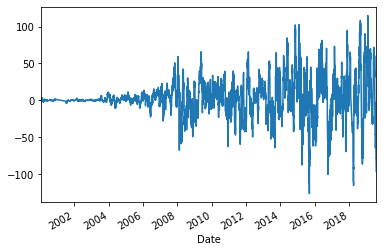

In [19]:
data['Close_diff_axis_20'] = data['Close_axis'] - data['Close_axis'].shift(20)
data['Close_diff_axis_20'].dropna().plot()

In [20]:
axis_diff_20 = data['Close_diff_axis_20']
axis_diff_20.dropna(inplace=True)

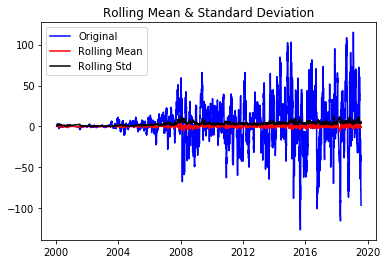

Results of Dickey-Fuller Test:
Test Statistic                -9.704907e+00
p-value                        1.048187e-16
#Lags Used                     2.300000e+01
Number of Observations Used    4.589000e+03
Critical Value (1%)           -3.431776e+00
Critical Value (5%)           -2.862170e+00
Critical Value (10%)          -2.567105e+00
dtype: float64


In [21]:
test_stationarity(axis_diff_20)

## Order of 20 is required for Axis

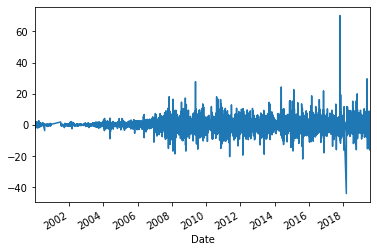

In [22]:
data['Close_diff_sbi'] = data['Close_sbi'] - data['Close_sbi'].shift(1)
data['Close_diff_sbi'].dropna().plot()

In [23]:
sbi_diff = data['Close_diff_sbi']
sbi_diff.dropna(inplace=True)

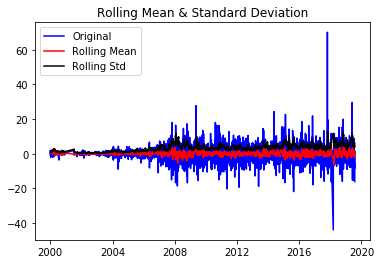

Results of Dickey-Fuller Test:
Test Statistic                  -63.301655
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    4631.000000
Critical Value (1%)              -3.431763
Critical Value (5%)              -2.862164
Critical Value (10%)             -2.567102
dtype: float64


In [24]:
test_stationarity(sbi_diff)

## Order of 1 is enough for SBI

In [26]:
close_diff_icici = pd.DataFrame(close_diff_icici)

In [28]:
# splitting into train and validation
train = close_diff_icici[:3000]
valid = close_diff_icici[3000:]

# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)

# In the next step, we will create predictions for the validation set and check the RMSE using the actual values.
# making predictions
preds = []
for i in range(0,valid.shape[0]):
    a = train['Close_diff_icici'][len(train)-1632+i:].sum() + sum(preds)
    b = a/1632
    preds.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Close_diff_icici'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 Shape of training set:
(3000, 1)

 Shape of validation set:
(1632, 1)

 RMSE value on validation set:
5.111849194006598


C:\Users\Chithsabesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Chithsabesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


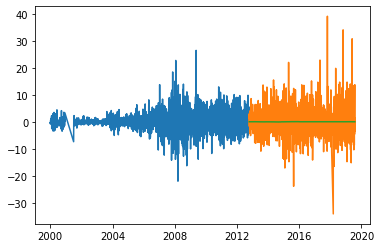

In [29]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close_diff_icici'])
plt.plot(valid[['Close_diff_icici', 'Predictions']])

In [30]:
close_diff_hdfc_10 = pd.DataFrame(close_diff_hdfc_10)

In [31]:
close_diff_hdfc_10.shape

(4623, 1)

In [33]:
train_hdfc = close_diff_hdfc_10[:3000]
valid_hdfc = close_diff_hdfc_10[3000:]

# shapes of training set
print('\n Shape of training set:')
print(train_hdfc.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid_hdfc.shape)

# In the next step, we will create predictions for the validation set and check the RMSE using the actual values.
# making predictions
preds = []
for i in range(0,valid_hdfc.shape[0]):
    a = train_hdfc['Close_diff_hdfc_10'][len(train_hdfc)-1622+i:].sum() + sum(preds)
    b = a/1622
    preds.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid_hdfc['Close_diff_hdfc_10'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 Shape of training set:
(3000, 1)

 Shape of validation set:
(1623, 1)

 RMSE value on validation set:
44.207187810831016


C:\Users\Chithsabesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Chithsabesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


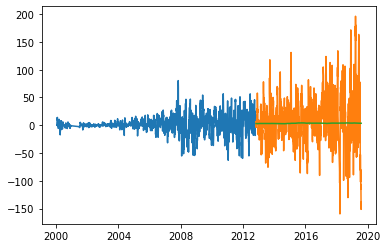

In [34]:
valid_hdfc['Predictions'] = 0
valid_hdfc['Predictions'] = preds
plt.plot(train_hdfc['Close_diff_hdfc_10'])
plt.plot(valid_hdfc[['Close_diff_hdfc_10', 'Predictions']])

In [35]:
axis_diff_20.shape

(4613,)

In [36]:
axis_diff_20 = pd.DataFrame(axis_diff_20)

In [38]:
#Moving Average for axis
train_axis = axis_diff_20[:3000]
valid_axis = axis_diff_20[3000:]

# shapes of training set
print('\n Shape of training set:')
print(train_axis.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid_axis.shape)

# In the next step, we will create predictions for the validation set and check the RMSE using the actual values.
# making predictions
preds = []
for i in range(0,valid_axis.shape[0]):
    a = train_axis['Close_diff_axis_20'][len(train_axis)-1613+i:].sum() + sum(preds)
    b = a/1613
    preds.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid_axis['Close_diff_axis_20'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 Shape of training set:
(3000, 1)

 Shape of validation set:
(1613, 1)

 RMSE value on validation set:
36.92654835131933


C:\Users\Chithsabesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Chithsabesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


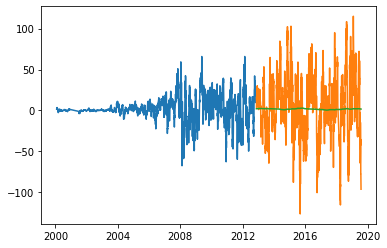

In [39]:
valid_axis['Predictions'] = 0
valid_axis['Predictions'] = preds
plt.plot(train_axis['Close_diff_axis_20'])
plt.plot(valid_axis[['Close_diff_axis_20', 'Predictions']])

In [41]:
sbi_diff = pd.DataFrame(sbi_diff)

In [42]:
# splitting into train and validation
train_sbi = sbi_diff[:3000]
valid_sbi = sbi_diff[3000:]

# shapes of training set
print('\n Shape of training set:')
print(train_sbi.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid_sbi.shape)

# In the next step, we will create predictions for the validation set and check the RMSE using the actual values.
# making predictions
preds = []
for i in range(0,valid_sbi.shape[0]):
    a = train_sbi['Close_diff_sbi'][len(train_sbi)-1632+i:].sum() + sum(preds)
    b = a/1632
    preds.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid_sbi['Close_diff_sbi'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 Shape of training set:
(3000, 1)

 Shape of validation set:
(1632, 1)

 RMSE value on validation set:
5.184377571791041


C:\Users\Chithsabesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Chithsabesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


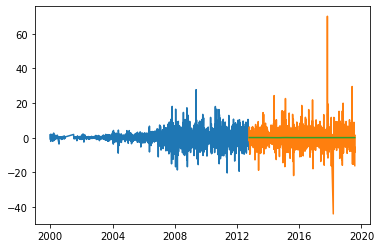

In [43]:
valid_sbi['Predictions'] = 0
valid_sbi['Predictions'] = preds
plt.plot(train_sbi['Close_diff_sbi'])
plt.plot(valid_sbi[['Close_diff_sbi', 'Predictions']])

## SBI and ICICI's Moving Average performed very well as compared to HDFC and Axis. One thing we can infer from here is the order of differencing in SBI and ICICI was only 1. While the order was much larger in HDFC and Axis.

## Applying Auto-Arima for all the banks

In [45]:


training = train['Close_diff_icici']
validation = valid['Close_diff_icici']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)


Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=15467.147, BIC=15497.157, Fit time=23.035 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=19139.694, BIC=19151.698, Fit time=0.180 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=17777.312, BIC=17801.320, Fit time=2.924 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=15498.779, BIC=15522.787, Fit time=18.356 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=15469.212, BIC=15505.224, Fit time=29.789 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=17412.347, BIC=17436.355, Fit time=4.397 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=15482.776, BIC=15518.788, Fit time=53.824 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=15492.529, BIC=15534.544, Fit time=64.423 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=15477.692, BIC=15513.704, Fit time=17.913 seconds
Fit 

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(1, 1, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(0, 1, 1, 12), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend=None,
      with_intercept=True)

In [46]:
forecast = model.predict(n_periods=1632)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

In [47]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close_diff_icici'])-np.array(forecast['Prediction'])),2)))
rms

5.131240857588308

## RMSE for ICICI is same in Moving average and in Arima

In [ ]:
##Arima for HDFC

In [60]:
training_hdfc = train_hdfc['Close_diff_hdfc_10']
validation_hdfc = valid_hdfc['Close_diff_hdfc_10']

model = auto_arima(training_hdfc, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training_hdfc)


Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=20135.602, BIC=20165.612, Fit time=28.605 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=22084.682, BIC=22096.686, Fit time=0.371 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=21406.226, BIC=21430.234, Fit time=4.585 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=20136.398, BIC=20160.406, Fit time=17.865 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=20137.096, BIC=20173.108, Fit time=29.668 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=22059.019, BIC=22083.028, Fit time=3.095 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=20136.996, BIC=20173.008, Fit time=79.125 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=20134.731, BIC=20176.745, Fit time=64.668 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=20136.338, BIC=20172.350, Fit time=43.877 seconds
Fit 

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(2, 1, 2),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(0, 1, 1, 12), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend=None,
      with_intercept=True)

In [63]:
forecast = model.predict(n_periods=1623)
forecast = pd.DataFrame(forecast,index = validation_hdfc.index,columns=['Prediction'])

In [64]:
validation_hdfc = pd.DataFrame(validation_hdfc)

In [65]:
rms=np.sqrt(np.mean(np.power((np.array(validation_hdfc['Close_diff_hdfc_10'])-np.array(forecast['Prediction'])),2)))
rms

44.71930648596616

In [44]:
##Arima for axis
training_axis = train_axis['Close_diff_axis_20']
validation_axis = valid_axis['Close_diff_axis_20']

model = auto_arima(training_axis, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training_axis)



Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=18352.347, BIC=18382.357, Fit time=11.346 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=20484.616, BIC=20496.620, Fit time=0.219 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=19512.713, BIC=19536.721, Fit time=2.521 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=18350.356, BIC=18374.364, Fit time=8.501 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=18346.767, BIC=18376.777, Fit time=8.367 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=19512.678, BIC=19536.686, Fit time=4.057 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=18347.669, BIC=18383.681, Fit time=54.267 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=20472.734, BIC=20490.740, Fit time=0.508 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=18348.662, BIC=18390.676, Fit time=32.248 seconds
Fit ARI

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(1, 1, 2),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(0, 1, 1, 12), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend=None,
      with_intercept=True)

In [46]:
forecast = model.predict(n_periods=1613)
forecast = pd.DataFrame(forecast,index = validation_axis.index,columns=['Prediction'])

In [47]:
validation_axis = pd.DataFrame(validation_axis)

In [48]:
rms=np.sqrt(np.mean(np.power((np.array(validation_axis['Close_diff_axis_20'])-np.array(forecast['Prediction'])),2)))
rms

37.18772444974735

In [49]:
#Arima for SBI
training_sbi = train_sbi['Close_diff_sbi']
validation_sbi = valid_sbi['Close_diff_sbi']

model = auto_arima(training_sbi, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training_sbi)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=15855.233, BIC=15885.243, Fit time=14.302 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=19644.353, BIC=19656.357, Fit time=0.180 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=18100.920, BIC=18124.928, Fit time=3.450 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=15885.543, BIC=15909.552, Fit time=10.131 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=15854.101, BIC=15890.113, Fit time=28.559 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=16963.397, BIC=16993.407, Fit time=12.744 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=15854.060, BIC=15896.074, Fit time=76.132 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=15882.540, BIC=15918.552, Fit time=47.489 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=15855.343, BIC=15903.359, Fit time=115.444 seconds
Fi

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(1, 1, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(1, 1, 2, 12), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend=None,
      with_intercept=True)

In [51]:
forecast = model.predict(n_periods=1632)
forecast = pd.DataFrame(forecast,index = validation_sbi.index,columns=['Prediction'])

In [52]:
validation_sbi = pd.DataFrame(validation_sbi)

In [53]:
rms=np.sqrt(np.mean(np.power((np.array(validation_sbi['Close_diff_sbi'])-np.array(forecast['Prediction'])),2)))
rms

5.262924896626124

In [91]:
close_diff_icici = pd.DataFrame(close_diff_icici)

In [77]:
close_diff_icici['Date'] = close_diff_icici.index



In [78]:
close_diff_icici['DayofWeek'] = close_diff_icici['Date'].dt.dayofweek

In [79]:
close_diff_icici

,Close_diff_icici,Date,Day_number,DayofWeek
Date,,,,
2000-01-04,-0.3455,2000-01-04,1,1
2000-01-05,-0.7909,2000-01-05,2,2
2000-01-06,-0.0273,2000-01-06,3,3
2000-01-07,-0.5727,2000-01-07,4,4
2000-01-10,0.7182,2000-01-10,0,0
...,...,...,...,...
2019-07-24,-3.7000,2019-07-24,2,2
2019-07-25,0.5000,2019-07-25,3,3
2019-07-26,6.4500,2019-07-26,4,4


In [144]:
#End or begining of week
close_diff_icici['mon_fri'] = 0
for i in range(0,len(close_diff_icici)):
    if (close_diff_icici['DayofWeek'][i] == 0 or close_diff_icici['DayofWeek'][i] == 4):
        close_diff_icici['mon_fri'][i] = 1
    else:
        close_diff_icici['mon_fri'][i] = 0

C:\Users\Chithsabesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Chithsabesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [95]:
#End or beginning of month
close_diff_icici['DayofMonth'] = close_diff_icici.Date.dt.day

In [155]:
condlist = [close_diff_icici['DayofMonth'] ==1,close_diff_icici['DayofMonth'] ==2,close_diff_icici['DayofMonth'] ==30,close_diff_icici['DayofMonth'] ==31]
choicelist = [1,1,1,1]

In [158]:
close_diff_icici['start_end_month'] = np.select(condlist, choicelist)

In [159]:
close_diff_icici['start_end_month'].value_counts()

0    4117
1     515
Name: start_end_month, dtype: int64

In [163]:
close_diff_icici

,Close_diff_icici,Date,Day_number,DayofWeek,mon_fri,DayofMonth,startmonth_endmonth,start_end_month
Date,,,,,,,,
2000-01-04,-0.3455,2000-01-04,1,1,0,4,0,0
2000-01-05,-0.7909,2000-01-05,2,2,0,5,0,0
2000-01-06,-0.0273,2000-01-06,3,3,0,6,0,0
2000-01-07,-0.5727,2000-01-07,4,4,1,7,0,0
2000-01-10,0.7182,2000-01-10,0,0,1,10,0,0
...,...,...,...,...,...,...,...,...
2019-07-24,-3.7000,2019-07-24,2,2,0,24,0,0
2019-07-25,0.5000,2019-07-25,3,3,0,25,0,0
2019-07-26,6.4500,2019-07-26,4,4,1,26,0,0


In [167]:
close_diff_icici['Month'] = close_diff_icici.Date.dt.month

In [168]:
close_diff_icici['Month'].value_counts()

7     422
8     401
5     400
1     399
6     391
9     389
12    382
3     381
10    377
11    371
4     363
2     356
Name: Month, dtype: int64

In [169]:
condlist = [close_diff_icici['Month'] == 1,close_diff_icici['Month'] == 12]
choicelist = [1,1]

In [170]:
close_diff_icici['start_end_year'] = np.select(condlist, choicelist)

In [173]:
close_diff_icici['start_end_year'].value_counts()

0    3851
1     781
Name: start_end_year, dtype: int64

In [174]:
new_data_icici = close_diff_icici[['Close_diff_icici','mon_fri','start_end_month','start_end_year']]

In [177]:
#split into train and validation
train_linear_icici = new_data_icici[:3000]
valid_linear_icici = new_data_icici[3000:]

x_train = train_linear_icici.drop('Close_diff_icici', axis=1)
y_train = train_linear_icici['Close_diff_icici']
x_valid = valid_linear_icici.drop('Close_diff_icici', axis=1)
y_valid = valid_linear_icici['Close_diff_icici']

#implement linear regression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [178]:
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

5.115278900769256

## Linear Regression also giving similar RMSE as ARIMA and MA

In [44]:
close_diff_hdfc_10['Date'] = close_diff_hdfc_10.index


In [45]:
close_diff_hdfc_10['DayofWeek'] = close_diff_hdfc_10['Date'].dt.dayofweek

In [46]:
#End or begining of week
close_diff_hdfc_10['mon_fri'] = 0
for i in range(0,len(close_diff_hdfc_10)):
    if (close_diff_hdfc_10['DayofWeek'][i] == 0 or close_diff_hdfc_10['DayofWeek'][i] == 4):
        close_diff_hdfc_10['mon_fri'][i] = 1
    else:
        close_diff_hdfc_10['mon_fri'][i] = 0

C:\Users\Chithsabesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Chithsabesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [47]:
close_diff_hdfc_10['mon_fri'].value_counts()

0    2783
1    1840
Name: mon_fri, dtype: int64

In [48]:
#End or beginning of month
close_diff_hdfc_10['DayofMonth'] = close_diff_hdfc_10.Date.dt.day

In [49]:
condlist = [close_diff_hdfc_10['DayofMonth'] ==1,close_diff_hdfc_10['DayofMonth'] ==2,close_diff_hdfc_10['DayofMonth'] ==30,close_diff_hdfc_10['DayofMonth'] ==31]
choicelist = [1,1,1,1]

In [50]:
close_diff_hdfc_10['start_end_month'] = np.select(condlist, choicelist)

In [51]:
close_diff_hdfc_10['start_end_month'].value_counts()

0    4108
1     515
Name: start_end_month, dtype: int64

In [52]:
close_diff_hdfc_10['Month'] = close_diff_hdfc_10.Date.dt.month

In [53]:
condlist = [close_diff_hdfc_10['Month'] == 1,close_diff_hdfc_10['Month'] == 12]
choicelist = [1,1]

In [54]:
close_diff_hdfc_10['start_end_year'] = np.select(condlist, choicelist)

In [55]:
close_diff_hdfc_10['start_end_year'].value_counts()

0    3851
1     772
Name: start_end_year, dtype: int64

In [57]:
new_data_hdfc = close_diff_hdfc_10[['Close_diff_hdfc_10','mon_fri','start_end_month','start_end_year']]

In [58]:
#split into train and validation
train_linear_hdfc = new_data_hdfc[:3000]
valid_linear_hdfc = new_data_hdfc[3000:]

x_train = train_linear_hdfc.drop('Close_diff_hdfc_10', axis=1)
y_train = train_linear_hdfc['Close_diff_hdfc_10']
x_valid = valid_linear_hdfc.drop('Close_diff_hdfc_10', axis=1)
y_valid = valid_linear_hdfc['Close_diff_hdfc_10']

#implement linear regression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

44.46781650999427

In [60]:
##HDFC same result

In [61]:
#Linear for axis
axis_diff_20['Date'] = axis_diff_20.index



In [62]:
axis_diff_20['DayofWeek'] = axis_diff_20['Date'].dt.dayofweek

In [63]:
#End or begining of week
axis_diff_20['mon_fri'] = 0
for i in range(0,len(axis_diff_20)):
    if (axis_diff_20['DayofWeek'][i] == 0 or axis_diff_20['DayofWeek'][i] == 4):
        axis_diff_20['mon_fri'][i] = 1
    else:
        axis_diff_20['mon_fri'][i] = 0

C:\Users\Chithsabesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Chithsabesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [64]:
axis_diff_20['mon_fri'].value_counts()

0    2778
1    1835
Name: mon_fri, dtype: int64

In [65]:
#End or beginning of month
axis_diff_20['DayofMonth'] = axis_diff_20.Date.dt.day

In [66]:
condlist = [axis_diff_20['DayofMonth'] ==1,axis_diff_20['DayofMonth'] ==2,axis_diff_20['DayofMonth'] ==30,axis_diff_20['DayofMonth'] ==31]
choicelist = [1,1,1,1]

In [67]:
axis_diff_20['start_end_month'] = np.select(condlist, choicelist)

In [68]:
axis_diff_20['start_end_month'].value_counts()

0    4099
1     514
Name: start_end_month, dtype: int64

In [71]:
axis_diff_20['Month'] = axis_diff_20.Date.dt.month
condlist = [axis_diff_20['Month'] == 1,axis_diff_20['Month'] == 12]
choicelist = [1,1]
axis_diff_20['start_end_year'] = np.select(condlist, choicelist)

In [72]:
axis_diff_20['start_end_year'].value_counts()

0    3851
1     762
Name: start_end_year, dtype: int64

In [74]:
new_data_axis = axis_diff_20[['Close_diff_axis_20','mon_fri','start_end_month','start_end_year']]

In [75]:
#split into train and validation
train_linear_axis = new_data_axis[:3000]
valid_linear_axis = new_data_axis[3000:]

x_train = train_linear_axis.drop('Close_diff_axis_20', axis=1)
y_train = train_linear_axis['Close_diff_axis_20']
x_valid = valid_linear_axis.drop('Close_diff_axis_20', axis=1)
y_valid = valid_linear_axis['Close_diff_axis_20']

#implement linear regression
model = LinearRegression()
model.fit(x_train,y_train)
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms


36.92228127907125

In [76]:
#Linear for SBI
sbi_diff['Date'] = sbi_diff.index
sbi_diff['DayofWeek'] = sbi_diff['Date'].dt.dayofweek
#End or begining of week
sbi_diff['mon_fri'] = 0
for i in range(0,len(sbi_diff)):
    if (sbi_diff['DayofWeek'][i] == 0 or sbi_diff['DayofWeek'][i] == 4):
        sbi_diff['mon_fri'][i] = 1
    else:
        sbi_diff['mon_fri'][i] = 0



C:\Users\Chithsabesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Chithsabesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [77]:
sbi_diff['mon_fri'].value_counts()

0    2789
1    1843
Name: mon_fri, dtype: int64

In [78]:
#End or beginning of month
sbi_diff['DayofMonth'] = sbi_diff.Date.dt.day
condlist = [sbi_diff['DayofMonth'] ==1,sbi_diff['DayofMonth'] ==2,sbi_diff['DayofMonth'] ==30,sbi_diff['DayofMonth'] ==31]
choicelist = [1,1,1,1]
sbi_diff['start_end_month'] = np.select(condlist, choicelist)


In [79]:
sbi_diff['start_end_month'].value_counts()

0    4117
1     515
Name: start_end_month, dtype: int64

In [80]:
sbi_diff['Month'] = sbi_diff.Date.dt.month
condlist = [sbi_diff['Month'] == 1,sbi_diff['Month'] == 12]
choicelist = [1,1]
sbi_diff['start_end_year'] = np.select(condlist, choicelist)

In [81]:
sbi_diff['start_end_year'].value_counts()

0    3851
1     781
Name: start_end_year, dtype: int64

In [82]:
sbi_diff.columns

Index(['Close_diff_sbi', 'Date', 'DayofWeek', 'mon_fri', 'DayofMonth',
       'start_end_month', 'Month', 'start_end_year'],
      dtype='object')

In [84]:
new_data_sbi = sbi_diff[['Close_diff_sbi','mon_fri','start_end_month','start_end_year']]

In [88]:
#split into train and validation
train_linear_sbi = new_data_sbi[:3000]
valid_linear_sbi = new_data_sbi[3000:]

x_train = train_linear_sbi.drop('Close_diff_sbi', axis=1)
y_train = train_linear_sbi['Close_diff_sbi']
x_valid = valid_linear_sbi.drop('Close_diff_sbi', axis=1)
y_valid = valid_linear_sbi['Close_diff_sbi']

#implement linear regression
model = LinearRegression()
model.fit(x_train,y_train)
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

5.182264332238589

### Similar results in Linear Model of all 4 as well

### In Summary it can be told that all three models are giving similar results to SBI and ICICI.HDFC and Axis are getting same results. But since its not logical to take a differencing of 10 and 20. Lets try another method of Stationarizing the two stocks.

# Decomposing

###  In this approach, both trend and seasonality are modeled separately and the remaining part of the series is returned.

In [92]:
close_diff_icici

,Close_diff_icici
Date,
2000-01-04,-0.3455
2000-01-05,-0.7909
2000-01-06,-0.0273
2000-01-07,-0.5727
2000-01-10,0.7182
...,...
2019-07-24,-3.7000
2019-07-25,0.5000
2019-07-26,6.4500


Date
2000-01-03      34.8800
2000-01-04      34.8000
2000-01-05      33.7000
2000-01-06      33.5000
2000-01-07      33.9000
                ...    
2019-07-24    2279.8000
2019-07-25    2285.8000
2019-07-26    2276.3000
2019-07-29    2244.6000
2019-07-30    2253.3501
Name: Close_hdfc, Length: 4633, dtype: float64

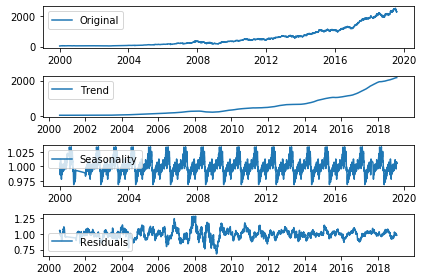

In [102]:
decomposing_hdfc =  data['Close_hdfc']
decomposing_hdfc = pd.DataFrame(decomposing_hdfc)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposing_hdfc = decomposing_hdfc['Close_hdfc']
decomposition = seasonal_decompose(decomposing_hdfc,model='multiplicative', freq = 252)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(decomposing_hdfc, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

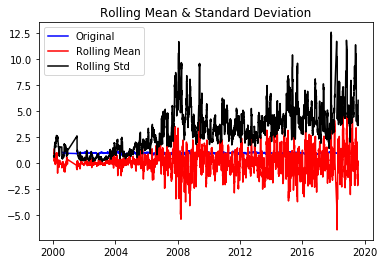

Results of Dickey-Fuller Test:
Test Statistic                -7.535241e+00
p-value                        3.492445e-11
#Lags Used                     5.000000e+00
Number of Observations Used    4.375000e+03
Critical Value (1%)           -3.431846e+00
Critical Value (5%)           -2.862201e+00
Critical Value (10%)          -2.567122e+00
dtype: float64


In [104]:
hdfc_decompose = residual
hdfc_decompose.dropna(inplace=True)
test_stationarity(hdfc_decompose)

## HDFC has been made stationary after decomposing
## Lets do the same for axis

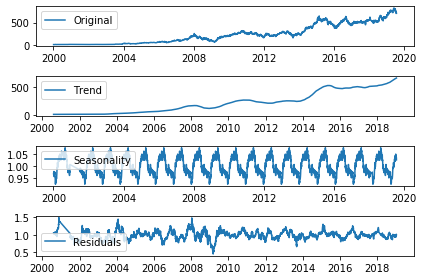

In [105]:
decomposing_axis =  data['Close_axis']
decomposing_axis = pd.DataFrame(decomposing_axis)
decomposing_axis = decomposing_axis['Close_axis']
decomposition = seasonal_decompose(decomposing_axis,model='multiplicative', freq = 252)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(decomposing_axis, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

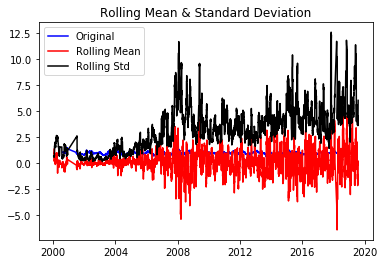

Results of Dickey-Fuller Test:
Test Statistic                -7.230699e+00
p-value                        1.998245e-10
#Lags Used                     1.500000e+01
Number of Observations Used    4.365000e+03
Critical Value (1%)           -3.431849e+00
Critical Value (5%)           -2.862202e+00
Critical Value (10%)          -2.567123e+00
dtype: float64


In [106]:
axis_decompose = residual
axis_decompose.dropna(inplace=True)
test_stationarity(axis_decompose)

## When differencing is not possible go for decomposition

### ARIMA for decomposed HDFC and Axis

In [107]:
hdfc_decompose

Date
2000-08-10    1.052745
2000-08-11    1.051322
2000-08-14    1.038510
2000-08-16    1.047969
2000-08-17    1.051493
                ...   
2019-01-08    0.982462
2019-01-09    0.986631
2019-01-10    0.981498
2019-01-11    0.981408
2019-01-14    0.976948
Name: Close_hdfc, Length: 4381, dtype: float64

In [108]:
hdfc_decompose = pd.DataFrame(hdfc_decompose)

In [109]:
train_hdfc_decompose = hdfc_decompose[:3000]
valid_hdfc_decompose = hdfc_decompose[3000:]

In [111]:
training_hdfc_decomposing = train_hdfc_decompose['Close_hdfc']
validation_hdfc_decomposing = valid_hdfc_decompose['Close_hdfc']

model = auto_arima(training_hdfc_decomposing, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training_hdfc_decomposing)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=-14572.546, BIC=-14542.536, Fit time=31.494 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=-12829.245, BIC=-12817.241, Fit time=1.276 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=-13627.028, BIC=-13603.020, Fit time=5.108 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=-14813.721, BIC=-14789.713, Fit time=22.816 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=-14825.971, BIC=-14795.961, Fit time=35.360 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=-13627.035, BIC=-13603.027, Fit time=11.194 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=-14829.215, BIC=-14793.202, Fit time=140.287 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=-14643.096, BIC=-14601.082, Fit time=48.780 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 2, 12); AIC=-14830.965, BIC=-14800.955, Fit time

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(0, 1, 0),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(0, 1, 1, 12), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend=None,
      with_intercept=True)

In [113]:
forecast = model.predict(n_periods=1381)
forecast = pd.DataFrame(forecast,index = validation_hdfc_decomposing.index,columns=['Prediction'])

In [116]:
validation_hdfc_decomposing = pd.DataFrame(validation_hdfc_decomposing)

In [118]:
rms=np.sqrt(np.mean(np.power((np.array(validation_hdfc_decomposing['Close_hdfc'])-np.array(forecast['Prediction'])),2)))
rms

0.48916817196969503

### Model performance improved after decomposing

In [121]:
axis_decompose = pd.DataFrame(axis_decompose)
train_axis_decompose = axis_decompose[:3000]
valid_axis_decompose = axis_decompose[3000:]
training_axis_decomposing = train_axis_decompose['Close_axis']
validation_axis_decomposing = valid_axis_decompose['Close_axis']

model = auto_arima(training_axis_decomposing, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training_axis_decomposing)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=-10531.009, BIC=-10519.005, Fit time=1.212 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=-11348.555, BIC=-11324.547, Fit time=6.548 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=-12533.932, BIC=-12509.924, Fit time=26.100 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=-12526.463, BIC=-12496.453, Fit time=38.683 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=-10529.192, BIC=-10511.186, Fit time=1.336 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=-12532.173, BIC=-12502.163, Fit time=69.589 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=-12504.111, BIC=-12468.099, Fit time=72.711 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=-12537.035, BIC=-12519.029, Fit time=19.480 seconds
Fit

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(0, 1, 0),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(0, 1, 1, 12), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend=None,
      with_intercept=True)

In [122]:
forecast = model.predict(n_periods=1381)
forecast = pd.DataFrame(forecast,index = validation_axis_decomposing.index,columns=['Prediction'])

In [123]:
validation_axis_decomposing = pd.DataFrame(validation_axis_decomposing)

In [124]:
rms=np.sqrt(np.mean(np.power((np.array(validation_axis_decomposing['Close_axis'])-np.array(forecast['Prediction'])),2)))
rms

0.42418256341337646

### Decomposing the series gives better results then doing differencing with a very high order.

In [6]:
data = {'Moving Average':pd.Series([5.111,44.207,36.912,5.184],index=['icici','hdfc','axis','sbi']),
        'Arima':pd.Series([5.131,44.719,37.187,5.262],index=['icici','hdfc','axis','sbi']),
        'Linear Regression':pd.Series([5.115,44.467,36.922,5.182],index=['icici','hdfc','axis','sbi'])}

In [8]:
data = pd.DataFrame(data)

In [9]:
data

,Moving Average,Arima,Linear Regression
icici,5.111,5.131,5.115
hdfc,44.207,44.719,44.467
axis,36.912,37.187,36.922
sbi,5.184,5.262,5.182


### All the values are same so we can say all the models perform well. 
## After decomposing hdfc and axis gave lesser RMSE. So inorder to avoid a large differencing order one can easily do decomposing 
## Since Stock Prices are dependent on various other factors like News of the company etc it is a very vast domain and this project only scratches the surface of it